In [1]:
import re
import pickle

In [2]:
true_dict = pickle.load(open('true.p','rb')) # This is the dictionary that contains all of the regular vocab

In [3]:
def init():
    currentPronunciation = dict() # occurrences of all pronunciations...
    previousPronunciationCurrentPronunciation = dict() # prev, curPron -- (V) curPron, prev
    nextPronunciationCurrentPronunciation = dict() # 
    previousCharacterCurrentPronunciation = dict() # 
    nextCharacterCurrentPronunciation = dict() # 
    allKanjiCurrentPronunciation = dict() # 
    # Features given pronunciation
    currentPronunciationPreviousPronunciation = dict() #
    currentPronunciationNextPronunciation = dict() # 
    currentPronunciationPreviousCharacter = dict() # 
    currentPronunciationNextCharacter = dict() # 
    currentPronunciationAllKanji = dict() # 
    currentKanjiPreviousPronunciation = dict() #
    currentKanjiNextPronunciation = dict() # 
    currentKanjiPreviousCharacter = dict() # 
    currentKanjiNextCharacter = dict() # 
    currentKanjiAllKanji = dict() # 
    currentKanjiOneChar = dict()
    # New for totals... ###
    globalPreviousPronunciation = dict() ### -> dict() -> [prevPron][curPron]
    globalPreviousCharacter = dict() ### -> [prevChar][curPron]
    globalNextPronunciation = dict() ### -> [nextPron][curPron]
    globalNextCharacter = dict() ### -> [nextChar][curPron]
    ##GLOBALGLOBALS
    allKanjiCurrentPronunciation = dict() # [curPron]
    allKanjiCurrentPronunciationPreviousPronunciation = dict() # [curPron][prevPron]
    allKanjiCurrentPronunciationNextPronunciation = dict()
    allKanjiCurrentPronunciationPreviousCharacter = dict()
    allKanjiCurrentPronunciationNextCharacter = dict()
    allKanjiCurrentPronunciationAllKanji = dict()

###
# number of characters in word
# 

def updateAllKanji(curKanji, curPron, allKanji):
    global allKanjiCurrentPronunciation, currentPronunciationAllKanji, currentKanjiAllKanji
    currentKanjiAllKanji[curKanji] = currentKanjiAllKanji.get(curKanji, dict())
    currentKanjiAllKanji[curKanji][allKanji] = currentKanjiAllKanji[curKanji].get(allKanji, 0) + 1
    currentPronunciationAllKanji[curKanji] = currentPronunciationAllKanji.get(curKanji, dict())
    currentPronunciationAllKanji[curKanji][curPron] = currentPronunciationAllKanji[curKanji].get(curPron, {True:0,False:0})
    currentPronunciationAllKanji[curKanji][curPron][allKanji] = currentPronunciationAllKanji[curKanji][curPron][allKanji] + 1
    allKanjiCurrentPronunciation[curKanji] = allKanjiCurrentPronunciation.get(curKanji, dict())
    allKanjiCurrentPronunciation[curKanji][allKanji] = allKanjiCurrentPronunciation[curKanji].get(allKanji, dict())
    allKanjiCurrentPronunciation[curKanji][allKanji][curPron] = allKanjiCurrentPronunciation[curKanji][allKanji].get(curPron,0) + 1
    
def updateCurPron(curKanji, curPron, oneChar):
    global currentPronunciation, v_cur_pron
    currentPronunciation[curKanji] = currentPronunciation.get(curKanji, dict())
    currentPronunciation[curKanji][curPron] = currentPronunciation[curKanji].get(curPron, 0) + 1
    currentKanjiOneChar[curKanji] = currentKanjiOneChar.get(curKanji, dict())
    currentKanjiOneChar[curKanji][oneChar] = currentKanjiOneChar[curKanji].get(oneChar, dict())
    currentKanjiOneChar[curKanji][oneChar][curPron] = currentKanjiOneChar[curKanji][oneChar].get(curPron, 0) + 1
    

def updatePrevPron(curKanji, prevPron, curPron):
    global previousPronunciationCurrentPronunciation, currentPronunciationPreviousPronunciation, globalPreviousPronunciation, currentKanjiPreviousPronunciation
    currentKanjiPreviousPronunciation[curKanji] = currentKanjiPreviousPronunciation.get(curKanji, dict())
    currentKanjiPreviousPronunciation[curKanji][prevPron] = currentKanjiPreviousPronunciation[curKanji].get(prevPron, 0) + 1
    previousPronunciationCurrentPronunciation[curKanji] = previousPronunciationCurrentPronunciation.get(curKanji, dict())
    previousPronunciationCurrentPronunciation[curKanji][prevPron] = previousPronunciationCurrentPronunciation[curKanji].get(prevPron, dict())
    previousPronunciationCurrentPronunciation[curKanji][prevPron][curPron] = previousPronunciationCurrentPronunciation[curKanji][prevPron].get(curPron,0) + 1
    currentPronunciationPreviousPronunciation[curKanji] = currentPronunciationPreviousPronunciation.get(curKanji, dict())
    currentPronunciationPreviousPronunciation[curKanji][curPron] = currentPronunciationPreviousPronunciation[curKanji].get(curPron, dict())
    currentPronunciationPreviousPronunciation[curKanji][curPron][prevPron] = currentPronunciationPreviousPronunciation[curKanji][curPron].get(prevPron,0) + 1
    globalPreviousPronunciation[prevPron] = globalPreviousPronunciation.get(prevPron, dict())
    globalPreviousPronunciation[prevPron][curPron] = globalPreviousPronunciation[prevPron].get(curPron, 0) + 1
    
def updatePrevChar(curKanji, prevChar, curPron):
    global previousCharacterCurrentPronunciation, currentPronunciationNextCharacter, globalPreviousCharacter, currentKanjiPreviousCharacter
    currentKanjiPreviousCharacter[curKanji] = currentKanjiPreviousCharacter.get(curKanji, dict())
    currentKanjiPreviousCharacter[curKanji][prevChar] = currentKanjiPreviousCharacter[curKanji].get(prevChar, 0) + 1
    previousCharacterCurrentPronunciation[curKanji] = previousCharacterCurrentPronunciation.get(curKanji, dict())
    previousCharacterCurrentPronunciation[curKanji][prevChar] = previousCharacterCurrentPronunciation[curKanji].get(prevChar, dict())
    previousCharacterCurrentPronunciation[curKanji][prevChar][curPron] = previousCharacterCurrentPronunciation[curKanji][prevChar].get(curPron,0) + 1
    currentPronunciationPreviousCharacter[curKanji] = currentPronunciationPreviousCharacter.get(curKanji, dict())
    currentPronunciationPreviousCharacter[curKanji][curPron] = currentPronunciationPreviousCharacter[curKanji].get(curPron, dict())
    currentPronunciationPreviousCharacter[curKanji][curPron][prevChar] = currentPronunciationPreviousCharacter[curKanji][curPron].get(prevChar,0) + 1
    globalPreviousCharacter[prevChar] = globalPreviousCharacter.get(prevChar, dict())
    globalPreviousCharacter[prevChar][curPron] = globalPreviousCharacter[prevChar].get(curPron, 0) + 1
    
def updateNextPron(curKanji, nextPron, curPron):
    global nextPronunciationCurrentPronunciation, currentPronunciationNextPronunciation, globalNextPronunciation, currentKanjiNextPronunciation
    currentKanjiNextPronunciation[curKanji] = currentKanjiNextPronunciation.get(curKanji, dict())
    currentKanjiNextPronunciation[curKanji][nextPron] = currentKanjiNextPronunciation[curKanji].get(nextPron, 0) + 1
    nextPronunciationCurrentPronunciation[curKanji] = nextPronunciationCurrentPronunciation.get(curKanji, dict())
    nextPronunciationCurrentPronunciation[curKanji][nextPron] = nextPronunciationCurrentPronunciation[curKanji].get(nextPron, dict())
    nextPronunciationCurrentPronunciation[curKanji][nextPron][curPron] = nextPronunciationCurrentPronunciation[curKanji][nextPron].get(curPron,0) + 1
    currentPronunciationNextPronunciation[curKanji] = currentPronunciationNextPronunciation.get(curKanji, dict())
    currentPronunciationNextPronunciation[curKanji][curPron] = currentPronunciationNextPronunciation[curKanji].get(curPron, dict())
    currentPronunciationNextPronunciation[curKanji][curPron][nextPron] = currentPronunciationNextPronunciation[curKanji][curPron].get(nextPron,0) + 1
    globalNextPronunciation[nextPron] = globalNextPronunciation.get(nextPron, dict())
    globalNextPronunciation[nextPron][curPron] = globalNextPronunciation[nextPron].get(curPron, 0) + 1
    
def updateNextChar(curKanji, nextChar, curPron):
    global nextCharacterCurrentPronunciation, currentPronunciationNextCharacter, globalNextCharacter, currentKanjiNextCharacter
    currentKanjiNextCharacter[curKanji] = currentKanjiNextCharacter.get(curKanji, dict())
    currentKanjiNextCharacter[curKanji][nextChar] = currentKanjiNextCharacter[curKanji].get(nextChar, 0) + 1
    nextCharacterCurrentPronunciation[curKanji] = nextCharacterCurrentPronunciation.get(curKanji, dict())
    nextCharacterCurrentPronunciation[curKanji][nextChar] = nextCharacterCurrentPronunciation[curKanji].get(nextChar, dict())
    nextCharacterCurrentPronunciation[curKanji][nextChar][curPron] = nextCharacterCurrentPronunciation[curKanji][nextChar].get(curPron,0) + 1
    currentPronunciationNextCharacter[curKanji] = currentPronunciationNextCharacter.get(curKanji, dict())
    currentPronunciationNextCharacter[curKanji][curPron] = currentPronunciationNextCharacter[curKanji].get(curPron, dict())
    currentPronunciationNextCharacter[curKanji][curPron][nextChar] = currentPronunciationNextCharacter[curKanji][curPron].get(nextChar,0) + 1
    globalNextCharacter[nextChar] = globalNextCharacter.get(nextChar, dict())
    globalNextCharacter[nextChar][curPron] = globalNextCharacter[nextChar].get(curPron, 0) + 1

In [35]:
########## PARTIAL PRONUNCIATIONS ###########

def init():
    global currentChar, currentPronunciationStart, currentPronunciationEnd, nextCharacterCurrentPronunciationEnd, previousCharacterCurrentPronunciationStart, previousPronunciationEndCurrentPronunciationStart, nextPronunciationStartCurrentPronunciationEnd# include all here
    previousPronunciationEndCurrentPronunciationStart = dict()
    nextPronunciationStartCurrentPronunciationEnd = dict()
    previousCharacterCurrentPronunciationStart = dict()
    nextCharacterCurrentPronunciationEnd = dict()
    currentPronunciationStart = dict()
    currentPronunciationEnd = dict()
    currentChar = dict()

def updatePreviousPronunciation(curPron, prevChar, prevPron, curKanji):
    global previousPronunciationEndCurrentPronunciationStart, previousCharacterCurrentPronunciationStart, currentPronunciationStart
    if len(prevPron) > 1 and prevPron != 'START':
        if prevPron[-1] in ['ゃ','ゅ','ょ']:
            if len(prevPron) > 2 and prevPron[-3] == 'っ':
                prevPron = prevPron[-3:]
            else:
                prevPron = prevPron[-2:]
        elif prevPron[-2] == 'っ':
            prevPron = prevPron[-2:]
        else:
            prevPron = prevPron[-1]
    if len(curPron) > 1:
        if curPron[0] == 'っ':
            if len(curPron) > 2 and curPron[2] in ['ゃ','ゅ','ょ']:
                curPron = curPron[:3]
            else:
                curPron = curPron[:2]
        elif curPron[1] in ['ゃ','ゅ','ょ']:
            curPron = curPron[:2]
        else:
            curPron = curPron[0]
    previousPronunciationEndCurrentPronunciationStart[prevPron] = previousPronunciationEndCurrentPronunciationStart.get(prevPron,dict())
    previousPronunciationEndCurrentPronunciationStart[prevPron][curPron] = previousPronunciationEndCurrentPronunciationStart[prevPron].get(curPron,0) + 1
    previousCharacterCurrentPronunciationStart[prevChar] = previousCharacterCurrentPronunciationStart.get(prevChar,dict())
    previousCharacterCurrentPronunciationStart[prevChar][curPron] = previousCharacterCurrentPronunciationStart[prevChar].get(curPron,0) + 1
    currentPronunciationStart[curKanji] = currentPronunciationStart.get(curKanji, dict())
    currentPronunciationStart[curKanji][curPron] = currentPronunciationStart[curKanji].get(curPron, 0) + 1
    
def updateNextPronunciation(curPron, nextChar, nextPron, curKanji):
    global currentPronunciationEnd, nextCharacterCurrentPronunciationEnd, nextPronunciationStartCurrentPronunciationEnd
    if len(nextPron) > 1 and nextPron != 'END':
        if nextPron[0] == 'っ':
            if len(nextPron) > 2 and nextPron[2] in ['ゃ','ゅ','ょ']:
                nextPron = nextPron[:3]
            else:
                nextPron = nextPron[:2]
        elif nextPron[1] in ['ゃ','ゅ','ょ']:
            nextPron = nextPron[:2]
        else:
            nextPron = nextPron[0]
    if len(curPron) > 1:
        if curPron[-1] in ['ゃ','ゅ','ょ']:
            if len(curPron) > 2 and curPron[-3] == 'っ':
                curPron = curPron[-3:]
            else:
                curPron = curPron[-2:]
        elif curPron[-2] == 'っ':
            curPron = curPron[-2:]
        else:
            curPron = curPron[-1]
    nextPronunciationStartCurrentPronunciationEnd[nextPron] = nextPronunciationStartCurrentPronunciationEnd.get(nextPron,dict())
    nextPronunciationStartCurrentPronunciationEnd[nextPron][curPron] = nextPronunciationStartCurrentPronunciationEnd[nextPron].get(curPron,0) + 1
    nextCharacterCurrentPronunciationEnd[nextChar] = nextCharacterCurrentPronunciationEnd.get(nextChar,dict())
    nextCharacterCurrentPronunciationEnd[nextChar][curPron] = nextCharacterCurrentPronunciationEnd[nextChar].get(curPron,0) + 1
    currentPronunciationEnd[curKanji] = currentPronunciationEnd.get(curKanji, dict())
    currentPronunciationEnd[curKanji][curPron] = currentPronunciationEnd[curKanji].get(curPron, 0) + 1


In [36]:
def createBayes():
    """Creates the Bayesian Network by creating dictionaries of occurences"""
    global currentChar
    init()
    for kanji, pronunciation in true_dict.items():
        #oneChar = False
        #if len(kanji) == 1:
        #    oneChar = True
        #if re.search("""[\u3040-\u30ff]+""", kanji) == None and len(kanji) != 0: # Finds kana
        #    kanjiWord = True
        #else: # either kana is present or the word is a singular character
            #kanjiWord = False
        for i in range(len(kanji)):
            #updateCurPron(kanji[i], pronunciation[i], oneChar)
            currentChar[kanji[i]] = currentChar.get(kanji[i], 0) + 1
            if i == 0: # First and last characters are special cases
                #updatePrevPron(kanji[i], 'START', pronunciation[i])
                #updatePrevChar(kanji[i], 'START', pronunciation[i])
                updatePreviousPronunciation(pronunciation[i], 'START', 'START', kanji[i])
            else:
                #updatePrevPron(kanji[i], pronunciation[i-1], pronunciation[i])
                #updatePrevChar(kanji[i], kanji[i-1], pronunciation[i])
                updatePreviousPronunciation(pronunciation[i], kanji[i-1], pronunciation[i-1], kanji[i])
            if i == (len(kanji) - 1):
                #updateNextPron(kanji[i], 'END', pronunciation[i])
                #updateNextChar(kanji[i], 'END', pronunciation[i])
                updateNextPronunciation(pronunciation[i], 'END', 'END', kanji[i])
            else:
                #updateNextPron(kanji[i], pronunciation[i+1], pronunciation[i])
                #updateNextChar(kanji[i], kanji[i+1], pronunciation[i])
                updateNextPronunciation(pronunciation[i], kanji[i+1], pronunciation[i+1], kanji[i])
        #updateAllKanji(kanji[i], pronunciation[i], kanjiWord)

In [37]:
createBayes()

In [7]:
previousPronunciationEndCurrentPronunciationStart

{'START': {'あ': 196,
  'い': 182,
  'う': 121,
  'え': 58,
  'お': 243,
  'か': 437,
  'が': 50,
  'き': 171,
  'きゃ': 5,
  'きゅ': 30,
  'きょ': 64,
  'ぎ': 22,
  'ぎゃ': 2,
  'ぎゅ': 2,
  'ぎょ': 11,
  'く': 105,
  'ぐ': 14,
  'け': 115,
  'げ': 58,
  'こ': 287,
  'ご': 47,
  'さ': 187,
  'ざ': 21,
  'し': 250,
  'しゃ': 15,
  'しゅ': 79,
  'しょ': 109,
  'じ': 90,
  'じゃ': 5,
  'じゅ': 49,
  'じょ': 50,
  'す': 103,
  'ず': 10,
  'せ': 168,
  'ぜ': 31,
  'そ': 101,
  'ぞ': 15,
  'た': 211,
  'だ': 62,
  'ち': 64,
  'ちゃ': 13,
  'ちゅ': 34,
  'ちょ': 46,
  'つ': 145,
  'て': 108,
  'で': 46,
  'と': 184,
  'ど': 67,
  'な': 129,
  'に': 51,
  'にゅ': 7,
  'にょ': 2,
  'ぬ': 13,
  'ね': 44,
  'の': 57,
  'は': 213,
  'ば': 36,
  'ひ': 150,
  'ひゃ': 1,
  'ひょ': 12,
  'び': 14,
  'びょ': 5,
  'ふ': 140,
  'ぶ': 53,
  'へ': 42,
  'べ': 12,
  'ほ': 115,
  'ぼ': 32,
  'ま': 135,
  'み': 91,
  'みゃ': 1,
  'みょ': 3,
  'む': 60,
  'め': 54,
  'も': 92,
  'や': 68,
  'ゆ': 71,
  'よ': 112,
  'ら': 12,
  'り': 22,
  'りゃ': 3,
  'りゅ': 6,
  'りょ': 29,
  'る': 4,
  'れ': 27,
  'ろ': 19,
  'わ': 

In [8]:
key_set = set(previousPronunciationEndCurrentPronunciationStart.keys())

for key in key_set:
    key_set = key_set | set(previousPronunciationEndCurrentPronunciationStart.get(key, dict()).keys())

In [9]:
key_set = key_set - {'ェ', 'ゴ', 'ジ', 'ッ', 'ト', 'マ', 'ム', 'ロ', 'ー'}

In [10]:
key_list = list(key_set)
key_list

['せ',
 'きょ',
 'ちょ',
 'だ',
 'りゃ',
 'さ',
 'じょ',
 'た',
 'や',
 'ふ',
 'ば',
 'よ',
 'しょ',
 'が',
 'お',
 'を',
 'く',
 'き',
 'ぎょ',
 'ち',
 'ろ',
 'きゅ',
 'ま',
 'と',
 'みゃ',
 'ぜ',
 'げ',
 'あ',
 'う',
 'ぎ',
 'にゅ',
 'へ',
 'こ',
 'ひょ',
 'ぎゃ',
 'ぞ',
 'にょ',
 'は',
 'で',
 'づ',
 'し',
 'わ',
 'ちゃ',
 'ぱ',
 'っ',
 'べ',
 'え',
 'っと',
 'ざ',
 'ぴ',
 'じゃ',
 'か',
 'ど',
 'きゃ',
 'しゅ',
 'ら',
 'ず',
 'み',
 'じゅ',
 'っぱ',
 'る',
 'れ',
 'な',
 'む',
 'ぶ',
 'ご',
 'ゃ',
 'て',
 'り',
 'い',
 'START',
 'の',
 'ぎゅ',
 'びょ',
 'も',
 'ぽ',
 'つ',
 'しゃ',
 'す',
 'ほ',
 'った',
 'りょ',
 'ひゃ',
 'そ',
 'ぺ',
 'け',
 'りゅ',
 'みょ',
 'び',
 'ね',
 'ちゅ',
 'に',
 'ゆ',
 'ぐ',
 'ぬ',
 'じ',
 'ひ',
 'ぷ',
 'ぼ',
 'ぢ',
 'め',
 'ん']

In [11]:
import numpy as np

In [12]:
heatmap = np.matrix(np.arange(10404).reshape((102, 102)))

In [13]:
i = 0 # row
for keyi in key_list: # row
    j = 0 # column
    for keyj in key_list: # column
        heatmap[i, j] = previousPronunciationEndCurrentPronunciationStart.get(keyi, dict()).get(keyj, 0)
        j += 1
    i += 1

In [14]:
import matplotlib.pyplot as plt

In [15]:
row_sums = heatmap.sum(axis=1)
row_sums[row_sums == 0] = 1
normalized_heatmap = heatmap / row_sums

In [16]:
col_sums = normalized_heatmap.sum(axis=0)
col_sums[col_sums == 0] = 1
dn_heatmap = normalized_heatmap / col_sums

In [17]:
col_sums = heatmap.sum(axis=0)
col_sums[col_sums == 0] = 1
ddn_heatmap = heatmap / col_sums
row_sums = ddn_heatmap.sum(axis=1)
row_sums[row_sums == 0] = 1
ddn_heatmap = ddn_heatmap / row_sums

In [18]:
######
import pandas as pd

In [19]:
normalized_df = pd.DataFrame(normalized_heatmap)

In [20]:
normalized_df.columns = key_list
normalized_df.index = key_list

In [33]:
#plt.plot(normalized_df)
#plt.show()
normalized_df.transpose()[[60]]

,る
せ,0.000000
きょ,0.000000
ちょ,0.000000
だ,0.018868
りゃ,0.000000
さ,0.000000
じょ,0.000000
た,0.037736
や,0.037736
ふ,0.000000


In [32]:
normalized_df[[60]]

,る
せ,0.488372
きょ,0.000000
ちょ,0.000000
だ,0.026667
りゃ,0.000000
さ,0.054054
じょ,0.000000
た,0.065693
や,0.013699
ふ,0.025000


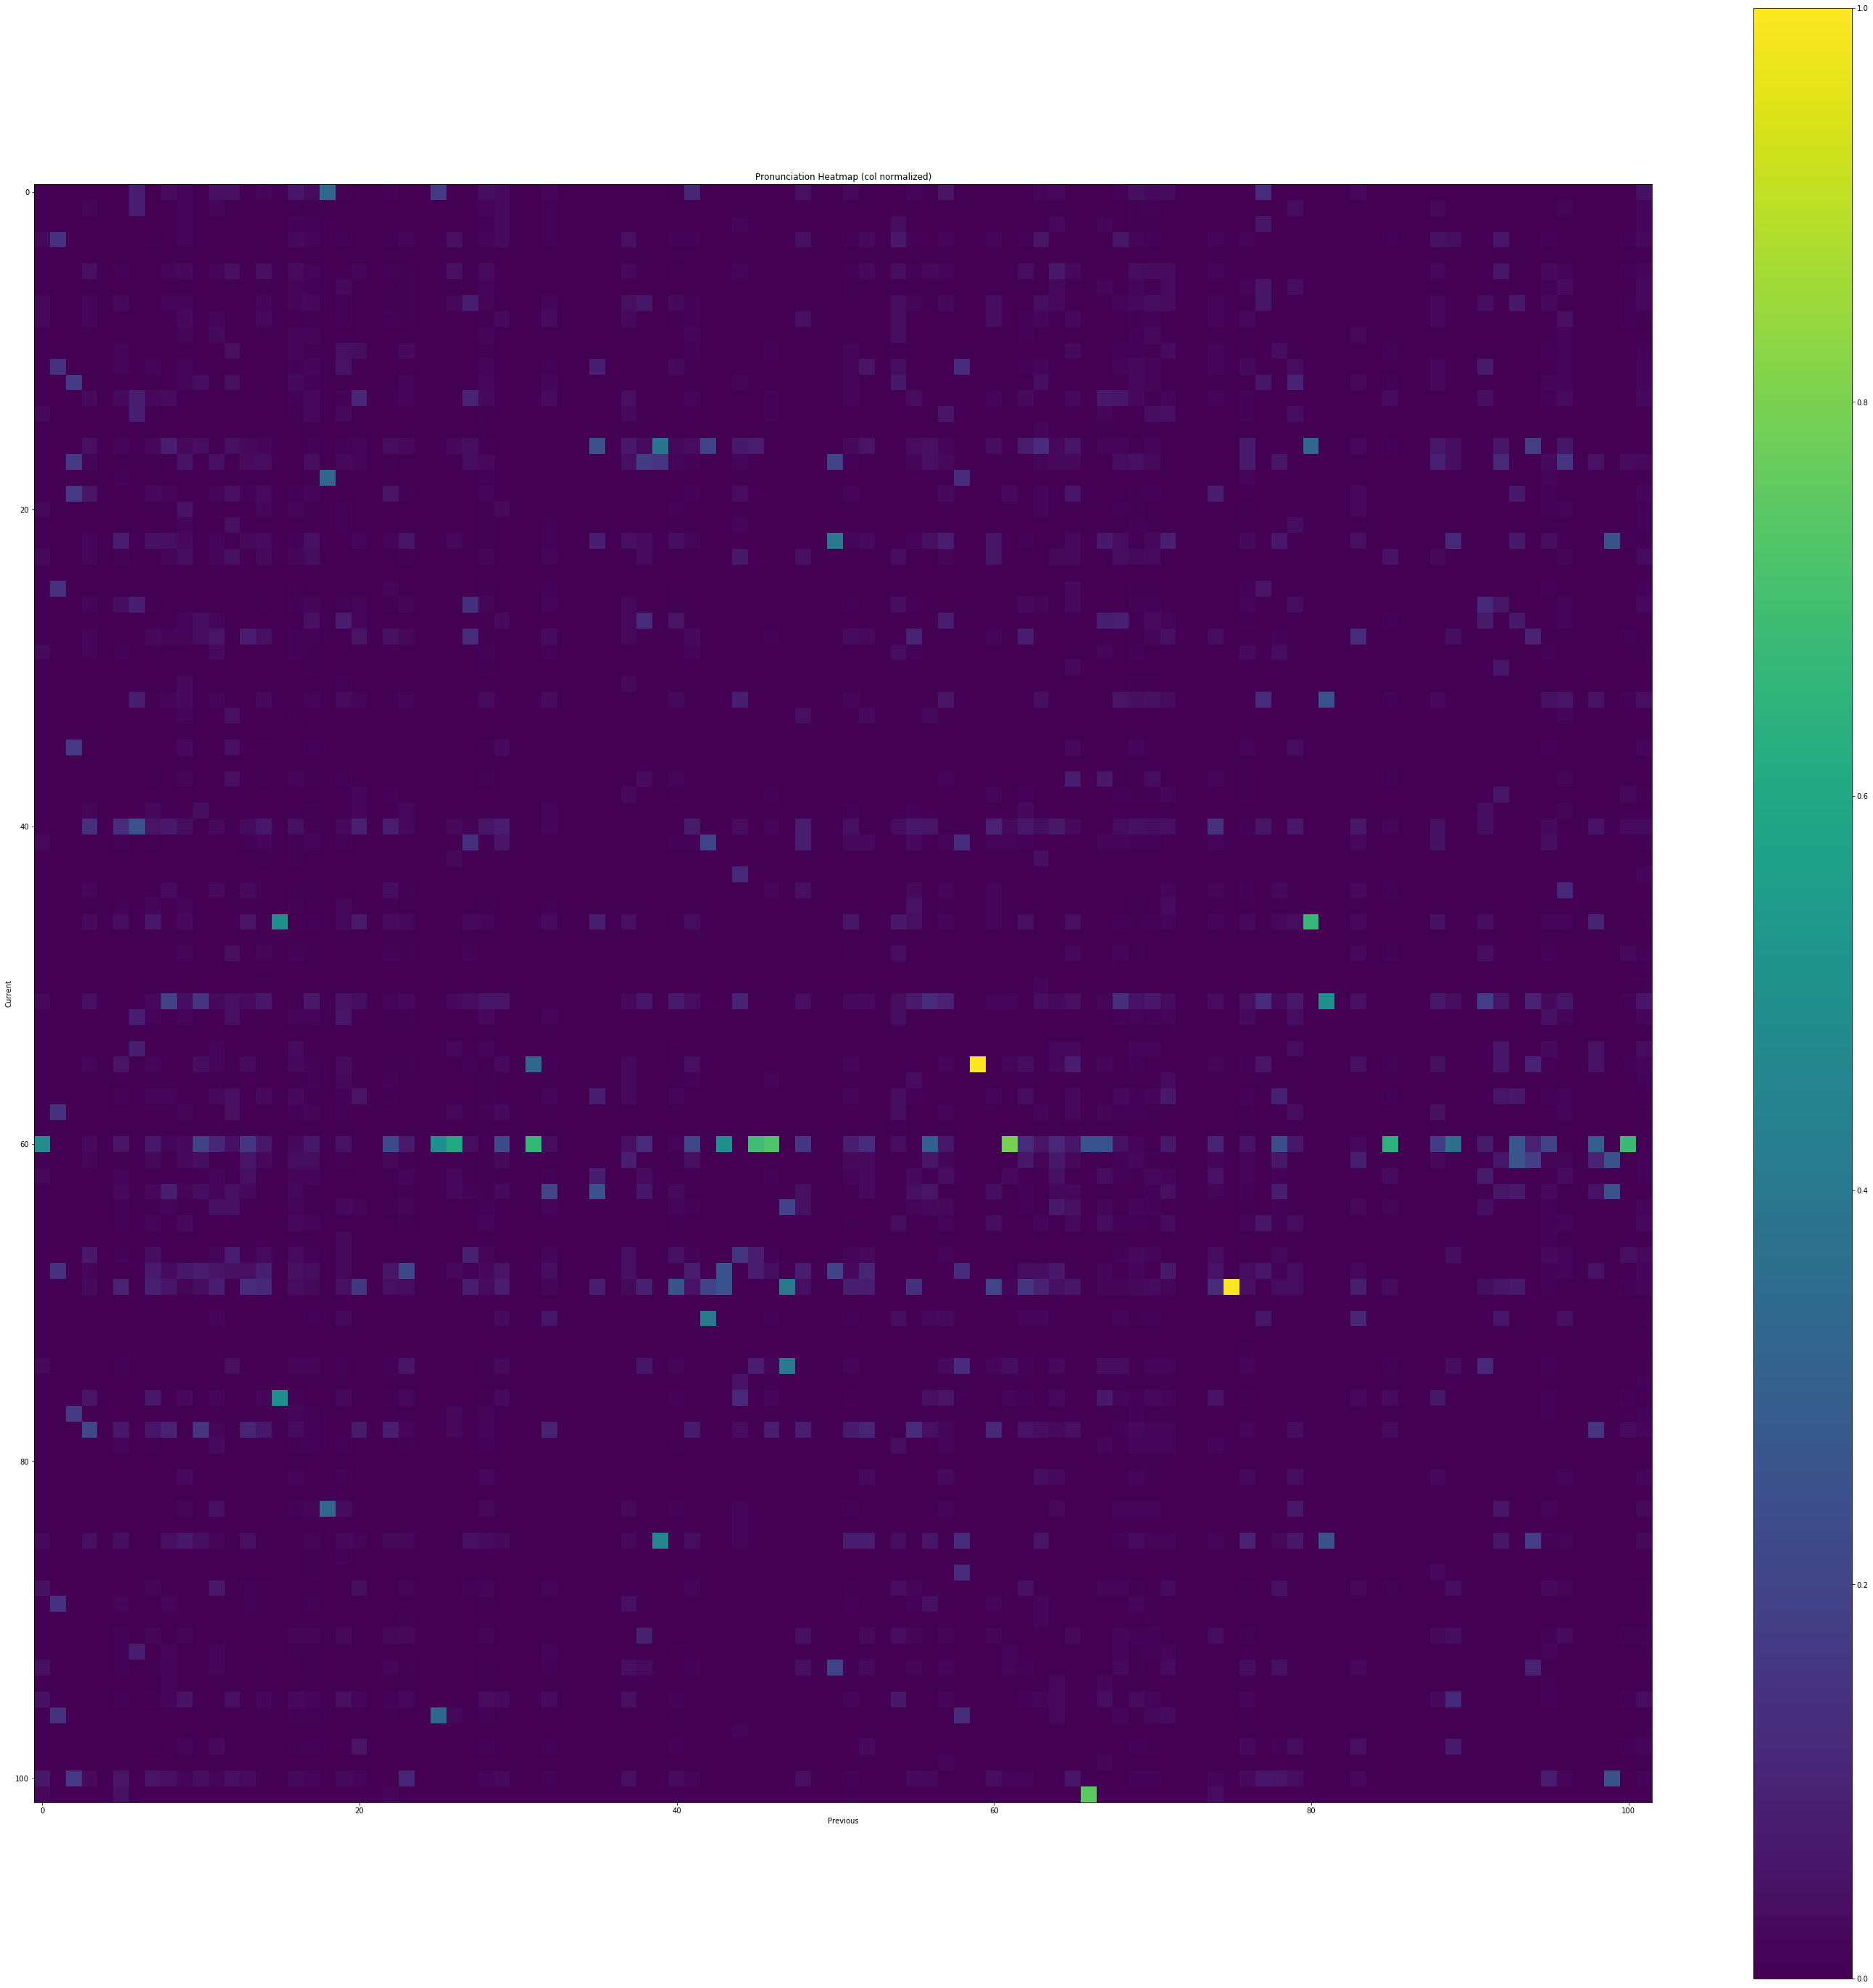

In [24]:
plt.figure(figsize=(50, 50))
plt.imshow(normalized_df.transpose())
plt.colorbar()
plt.xlabel("Previous")
plt.ylabel("Current")
plt.title('Pronunciation Heatmap (col normalized)')
plt.show()

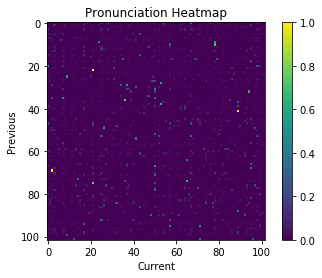

In [26]:
plt.imshow(ddn_heatmap)
plt.colorbar()
plt.xlabel("Current")
plt.ylabel("Previous")
plt.title('Pronunciation Heatmap (col then row normalized)')
plt.show()

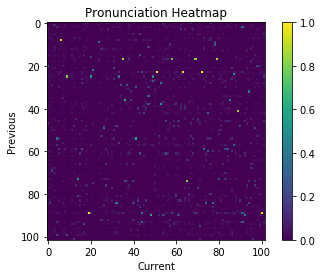

In [28]:
plt.imshow(dn_heatmap)
plt.colorbar()
plt.xlabel("Current")
plt.ylabel("Previous")
plt.title('Pronunciation Heatmap (row then col normalized)')
plt.show()

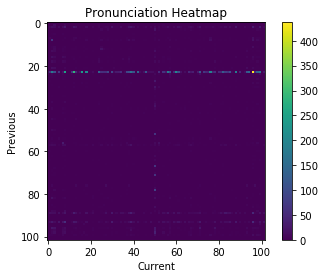

In [21]:
plt.imshow(heatmap)
plt.colorbar()
plt.xlabel("Current")
plt.ylabel("Previous")
plt.title('Pronunciation Heatmap (nonnormalized)')
plt.show()

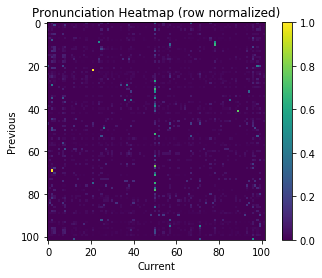

In [34]:
#plt.figure(figsize=(100, 100))
#plt.xticks(range(len(key_set)), key_set, size='large')
#plt.yticks(range(len(key_set)), key_set, size='large')
plt.imshow(normalized_heatmap)
plt.colorbar()
plt.xlabel("Current")
plt.ylabel("Previous")
plt.title('Pronunciation Heatmap (row normalized)')
plt.show()

In [43]:
normalized_heatmap[25:75,50]

matrix([[ 0.05454545],
        [ 0.06849315],
        [ 0.60869565],
        [ 0.06493506],
        [ 0.        ],
        [ 0.20353982],
        [ 0.69230769],
        [ 0.5       ],
        [ 0.        ],
        [ 0.11627907],
        [ 0.5       ],
        [ 0.        ],
        [ 0.09375   ],
        [ 0.25      ],
        [ 0.48837209],
        [ 0.10666667],
        [ 0.25      ],
        [ 0.025     ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.06451613],
        [ 0.09090909],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.68041237],
        [ 0.        ],
        [ 0.04950495],
        [ 0.        ],
        [ 0.07236842],
        [ 0.02469136],
        [ 0.        ],
        [ 0.        ],
        [ 0.04166667],
        [ 0.04      ],
        [ 0.23076923],
        [ 0.        ],
        [ 0.17391304],
        [ 0.        ],
        [ 0.07407407],
        [ 0.79518072],
        [ 0

In [8]:
#allKanjiCurrentPronunciation['人']
currentKanjiOneChar#[curKanji][oneChar] = currentKanjiOneChar[curKanji].get(oneChar, dict())

{'説': {False: {'せつ': 7, 'ぜつ': 1, 'と': 1}, True: {'せつ': 1}},
 '造': {False: {'ぞう': 7, 'つく': 2, 'づく': 1}},
 '添': {False: {'そ': 2}},
 '診': {False: {'しん': 4, 'み': 1}},
 '者': {False: {'しゃ': 12, 'じゃ': 2, 'もの': 1}, True: {'もの': 1}},
 'て': {False: {'て': 50}},
 '訪': {False: {'おとず': 1, 'たず': 1, 'ほう': 1}},
 '熱': {False: {'あつ': 1, 'ねつ': 5}, True: {'ねつ': 1}},
 '胆': {False: {'たん': 1}},
 '恐': {False: {'おそ': 5, 'きょう': 2}},
 '弟': {False: {'だい': 1}, True: {'おとうと': 1}},
 '瀬': {False: {'せ': 1}},
 '草': {False: {'ぞう': 1}, True: {'くさ': 1}},
 '泡': {True: {'あわ': 1}},
 '岸': {False: {'がん': 2}, True: {'きし': 1}},
 '賃': {False: {'ちん': 3}},
 '殴': {False: {'なぐ': 1}},
 'や': {False: {'や': 22}},
 '脈': {False: {'みゃく': 2}, True: {'みゃく': 1}},
 '志': {False: {'こころざ': 1, 'し': 4}, True: {'こころざし': 1}},
 '優': {False: {'すぐ': 1, 'やさ': 1, 'ゆう': 9}, True: {'やさ': 1}},
 '望': {False: {'のぞ': 4, 'ぼう': 10}},
 '縦': {False: {'じゅう': 1}, True: {'たて': 1}},
 '落': {False: {'お': 6, 'おち': 2, 'らく': 5}},
 '明': {False: {'あ': 7, 'あか': 1, 'あき': 1, 'みょう'

In [20]:
def getProbabilities(kanji=None,prevPron=None,prevChar=None,nextPron=None,nextChar=None,allKanji=None):
    """Inputs: kanji, prevPron?, prevChar?, nextPron?, nextChar?, allKanji?
? = optional
Output: A List of Dictionaries of occurences
TODO: Feed the list of dictionaries to computeProbabilities
This function returns all of the statistics for the current Kanji in
all contexts, independent of each other. This means that the nextPronunciation
dictionary will not be affected by the presence of an allKanji flag.

The order of the dictionaries are:
curPron, prevPron, prevChar, nextPron, nextChar, allKanji
"""
    dictionary_list = []
    keys = set(currentPronunciation.get(kanji, dict()).keys())
    dictionary_list.append(occurencesToPercentages(currentPronunciation.get(kanji, dict())))
    argument_list = []
    if prevPron != None:
        argument_list.append(prevPron)
        keys = keys | set(currentPronunciationPreviousPronunciation.get(kanji, dict()).keys())
        dictionary_list.append(occurencesToPercentagesArg(currentPronunciationPreviousPronunciation.get(kanji, dict())))
    if prevChar != None:
        argument_list.append(prevChar)
        keys = keys | set(currentPronunciationPreviousCharacter.get(kanji, dict()).keys())
        dictionary_list.append(occurencesToPercentagesArg(currentPronunciationPreviousCharacter.get(kanji, dict())))
    if nextPron != None:
        argument_list.append(nextPron)
        keys = keys | set(currentPronunciationNextPronunciation.get(kanji, dict()).keys())
        dictionary_list.append(occurencesToPercentagesArg(currentPronunciationNextPronunciation.get(kanji, dict())))
    if nextChar != None:
        argument_list.append(nextChar)
        keys = keys | set(currentPronunciationNextCharacter.get(kanji, dict()).keys())
        dictionary_list.append(occurencesToPercentagesArg(currentPronunciationNextCharacter.get(kanji, dict())))
    if allKanji != None:
        argument_list.append(allKanji)
        keys = keys | set(currentPronunciationAllKanji.get(kanji, dict()).keys())
        dictionary_list.append(occurencesToPercentagesArg(currentPronunciationAllKanji.get(kanji, dict())))
    return bayesTheorem(dictionary_list, keys, argument_list)

In [21]:
def bayesTheorem(dictionary_list, keys, argument_list): #kanji
    """Inputs: dictionary_list, keys, argument_list
Outputs: Sorted list of probabilities
This function follows the Bayesian Theorem that as defined
in the following paper https://dl.dropboxusercontent.com/u/62448029/DAG_for_email.pdf
Basic formula:
P(pronunciation|feature1, feature2, ...) =
P(pronunciation)*P(feature1|pronunciation)*P(feature2|pronunciation)* ...
Arguments is synonymous with features in this example
"""
    #print(dictionary_list)
    return_dict = dict()
    for key in keys:
        return_dict[key] = return_dict.get(key, 0) + dictionary_list[0].get(key, 0)
        for i in range(len(argument_list)):
            return_dict[key] = dictionary_list[i + 1].get(key, dict()).get(argument_list[i], 0) * return_dict[key]
    return_dict = occurencesToPercentages(return_dict)
    return sorted(return_dict.items(), key=lambda kv: kv[1], reverse=True)

In [22]:
def occurencesToPercentagesArg(dict_of_occurences):
    """Input: A single dictionary of occurences as values for some key
Output: A single dictionary of percentages as values for some key"""
    
    #for (_, value) in dict_of_occurences.items():
    #    sum = 0
    #    for (_, v) in value.items():
    #        sum += v
    sum_dict = dict()
    for (key1, value1) in dict_of_occurences.items(): 
        sum = 0
        for (key2, value2) in value1.items():
            sum = sum + value2
        sum_dict[key1] = sum_dict.get(key1, dict())
        sum_dict[key1]['sum'] = sum
        for (key2, value2) in value1.items():
            if sum_dict[key1]['sum'] != 0:
                dict_of_occurences[key1][key2] = value2 / sum_dict[key1]['sum']
    #dict_of_occurences = sorted(dict_of_occurences.items(), key=lambda kv: kv[1], reverse=True)
    return dict_of_occurences

In [23]:
def occurencesToPercentages(dict_of_occurences):
    """Input: A single dictionary of occurences as values for some key
Output: A single dictionary of percentages as values for some key"""
    sum = 0
    for (_, value) in dict_of_occurences.items(): sum += value
    if sum != 0:
        for (key, value) in dict_of_occurences.items():
            dict_of_occurences[key] = value / sum
    #dict_of_occurences = sorted(dict_of_occurences.items(), key=lambda kv: kv[1], reverse=True)
    return dict_of_occurences

In [24]:
getProbabilities('人',allKanji=False)

[('ひと', 1.0), ('にん', 0.0), ('びと', 0.0), ('り', 0.0), ('じん', 0.0)]

In [125]:
def globalBayesTheorem(startDict, endDict, startKeys, endKeys, startArg, endArg):
    """Inputs: dictionary_list, keys, argument_list
Outputs: Sorted list of probabilities
This function follows the Bayesian Theorem that as defined
in the following paper https://dl.dropboxusercontent.com/u/62448029/DAG_for_email.pdf
Basic formula:
P(pronunciation|feature1, feature2, ...) =
P(pronunciation)*P(feature1|pronunciation)*P(feature2|pronunciation)* ...
Arguments is synonymous with features in this example
"""
    startReturnDict = dict()
    endReturnDict = dict()
    for key in startKeys:
        for i in range(len(startArg)):
            if i == 0:
                startReturnDict[key] = startDict[0].get(key, 0)
            else:
                startReturnDict[key] = startDict[i].get(key, 0) * startReturnDict.get(key, 0)
    for key in endKeys:
        for i in range(len(endArg)):
            if i == 0:
                endReturnDict[key] = endDict[0].get(key, 0)
            else:
                endReturnDict[key] = endDict[i].get(key, 0) * endReturnDict.get(key, 0)
    startReturnDict = occurencesToPercentages(startReturnDict)
    endReturnDict = occurencesToPercentages(endReturnDict)
    return [sorted(startReturnDict.items(), key=lambda kv: kv[1], reverse=True), sorted(endReturnDict.items(), key=lambda kv: kv[1], reverse=True)]
    # Maybe also return the actual pronunciations that the Kanji can be and the probabilities for each.
    # How do I fix sparseness? Should I get global data from NHK Easy News?

In [126]:
def getGlobalProbabilities(kanji=None,pronsKnown=False,prevPron=None,prevChar=None,nextPron=None,nextChar=None):
    """Inputs: kanji, prevPron?, prevChar?, nextPron?, nextChar?, allKanji?
? = optional
Output: A List of Dictionaries of occurences
TODO: Feed the list of dictionaries to computeProbabilities
This function returns all of the statistics for the current Kanji in
all contexts, independent of each other. This means that the nextPronunciation
dictionary will not be affected by the presence of an allKanji flag.

The order of the dictionaries are:
curPron, prevPron, prevChar, nextPron, nextChar, allKanji
"""
    
    startDictionaryList = []
    endDictionaryList = []
    startKeys = set()
    endKeys = set()
    startArgumentList = []
    endArgumentList = []
    if pronsKnown:
        startDictionaryList.append(occurencesToPercentages(currentPronunciationStart.get(kanji, dict())))
        startKeys = set(currentPronunciationStart.get(kanji, dict()).keys())
        endDictionaryList.append(occurencesToPercentages(currentPronunciationEnd.get(kanji, dict())))
        endKeys = set(currentPronunciationEnd.get(kanji, dict()).keys())
        startArgumentList.append(pronsKnown)
        endArgumentList.append(pronsKnown)
    if prevPron != None:
        startArgumentList.append(prevPron)
        startKeys = startKeys | set(previousPronunciationEndCurrentPronunciationStart.get(prevPron, dict()).keys())
        startDictionaryList.append(occurencesToPercentages(previousPronunciationEndCurrentPronunciationStart.get(prevPron, dict())))
    if prevChar != None:
        startArgumentList.append(prevChar)
        startKeys = startKeys | set(previousCharacterCurrentPronunciationStart.get(prevChar, dict()).keys())
        startDictionaryList.append(occurencesToPercentages(previousCharacterCurrentPronunciationStart.get(prevChar, dict())))
    if nextPron != None:
        endArgumentList.append(nextPron)
        endKeys = endKeys | set(nextPronunciationStartCurrentPronunciationEnd.get(nextPron, dict()).keys())
        endDictionaryList.append(occurencesToPercentages(nextPronunciationStartCurrentPronunciationEnd.get(nextPron, dict())))
    if nextChar != None:
        endArgumentList.append(nextChar)
        endKeys = endKeys | set(nextCharacterCurrentPronunciationEnd.get(nextChar, dict()).keys())
        endDictionaryList.append(occurencesToPercentages(nextCharacterCurrentPronunciationEnd.get(nextChar, dict())))
    return globalBayesTheorem(startDictionaryList, endDictionaryList, startKeys, endKeys, startArgumentList, endArgumentList)

In [123]:
getGlobalProbabilities('言', pronsKnown=True, nextPron='う')

[[('げ', 0.36363636363636365),
  ('こ', 0.2727272727272727),
  ('い', 0.22727272727272727),
  ('ご', 0.13636363636363635)],
 [('ん', 0.6690962099125365),
  ('い', 0.31341107871720114),
  ('と', 0.01749271137026239),
  ('お', 0.0),
  ('ば', 0.0),
  ('は', 0.0),
  ('ぎ', 0.0),
  ('も', 0.0),
  ('る', 0.0),
  ('わ', 0.0),
  ('の', 0.0),
  ('ろ', 0.0),
  ('え', 0.0),
  ('や', 0.0),
  ('ね', 0.0),
  ('か', 0.0),
  ('よ', 0.0),
  ('ら', 0.0),
  ('ひ', 0.0),
  ('こ', 0.0),
  ('ど', 0.0),
  ('む', 0.0),
  ('く', 0.0),
  ('し', 0.0),
  ('ふ', 0.0),
  ('が', 0.0),
  ('ず', 0.0),
  ('ゆ', 0.0),
  ('ぬ', 0.0),
  ('す', 0.0),
  ('じ', 0.0),
  ('う', 0.0),
  ('り', 0.0),
  ('き', 0.0),
  ('び', 0.0),
  ('そ', 0.0),
  ('つ', 0.0),
  ('だ', 0.0),
  ('ち', 0.0),
  ('あ', 0.0),
  ('さ', 0.0),
  ('ぼ', 0.0),
  ('ぶ', 0.0),
  ('た', 0.0),
  ('ほ', 0.0),
  ('な', 0.0),
  ('ま', 0.0)]]

In [128]:
getGlobalProbabilities('日', pronsKnown=True, nextChar='曜')

[[('ひ', 0.2631578947368421),
  ('に', 0.22807017543859648),
  ('び', 0.21052631578947367),
  ('か', 0.15789473684210525),
  ('じ', 0.14035087719298245)],
 [('ち', 0.43333333333333335),
  ('か', 0.3),
  ('つ', 0.26666666666666666),
  ('び', 0.0),
  ('い', 0.0),
  ('ど', 0.0),
  ('ん', 0.0),
  ('ひ', 0.0),
  ('く', 0.0)]]

In [129]:
getGlobalProbabilities('日', pronsKnown=True, prevChar='曜')

[[('び', 1.0), ('か', 0.0), ('ひ', 0.0), ('に', 0.0), ('じ', 0.0)],
 [('ひ', 0.2631578947368421),
  ('ち', 0.22807017543859648),
  ('び', 0.21052631578947367),
  ('か', 0.15789473684210525),
  ('つ', 0.14035087719298245)]]

In [53]:
createBayes()

In [98]:
nextCharacterCurrentPronunciationEnd['で']

{'い': 2, 'な': 1, 'ま': 2, 'め': 1, 'ゆ': 1, 'り': 1, 'る': 1, 'ろ': 1, 'ん': 2}

In [73]:
nextPronunciationStartCurrentPronunciationEnd['で']

{'い': 3,
 'え': 1,
 'し': 2,
 'な': 1,
 'の': 1,
 'は': 1,
 'ま': 2,
 'め': 2,
 'ゆ': 1,
 'り': 1,
 'る': 1,
 'ろ': 1,
 'ん': 2}

In [ ]:
### WHY ALLKANJI MATTERS: 微笑み hoho e mi　微笑 bi shou

In [39]:
### take all regular and[?] irregular words and push the pronunciations through globalPreviousPronunciation
### and globalNextPronunciation while holding small characters to the previous syllable

sorted(currentChar.items(), key=lambda kv: kv[1], reverse=True)

[('る', 745),
 ('い', 283),
 ('す', 204),
 ('り', 166),
 ('し', 158),
 ('く', 122),
 ('れ', 105),
 ('け', 104),
 ('う', 103),
 ('え', 96),
 ('む', 93),
 ('め', 87),
 ('か', 82),
 ('ま', 81),
 ('き', 73),
 ('出', 61),
 ('大', 60),
 ('人', 60),
 ('合', 57),
 ('ら', 57),
 ('日', 57),
 ('手', 54),
 ('気', 53),
 ('物', 52),
 ('て', 50),
 ('上', 47),
 ('見', 47),
 ('地', 46),
 ('生', 46),
 ('分', 45),
 ('学', 44),
 ('付', 44),
 ('下', 43),
 ('み', 43),
 ('っ', 43),
 ('に', 43),
 ('一', 41),
 ('わ', 40),
 ('行', 40),
 ('事', 38),
 ('引', 38),
 ('入', 37),
 ('取', 37),
 ('お', 37),
 ('間', 37),
 ('無', 37),
 ('用', 36),
 ('通', 36),
 ('な', 36),
 ('定', 35),
 ('中', 35),
 ('ち', 35),
 ('つ', 35),
 ('不', 33),
 ('名', 33),
 ('会', 33),
 ('立', 33),
 ('げ', 33),
 ('目', 32),
 ('動', 31),
 ('水', 30),
 ('金', 30),
 ('当', 30),
 ('年', 30),
 ('せ', 30),
 ('体', 30),
 ('度', 29),
 ('々', 29),
 ('が', 29),
 ('力', 28),
 ('じ', 28),
 ('び', 28),
 ('切', 28),
 ('点', 28),
 ('自', 28),
 ('ぐ', 27),
 ('来', 27),
 ('業', 26),
 ('先', 26),
 ('理', 26),
 ('の', 26),
 ('心', 26),
 ('本', 